<a href="https://colab.research.google.com/github/lonen8188/PythonAI/blob/4-2.SGDClassifier/hg_04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 에포크(epoch : 시대) -> 훈련세트를 한번 모두 사용하는 과정
# 확율적 경사 하강법 -> 실시간으로 학습하지만 시간이 지날수록 적은양(1개씩)으로 정확하게 학습(점진적 학습)
# 미니배치 경사하강법 -> 무작위로 몇개의 샘플을 선택해서 경사를 내려가는 기법
# 배치 경사 하강법 -> 극단적으로 한 번 경사로를 따라 이동하는 전체 샘플(리소스 관리 필수)
# 손실 함수(Loss function) -> 머신런닝이 알고리즘이 얼마나 엉터리인지 측정하는 기준(작은수록 좋음) -> 이 값을 찾아서 조금씩 이동
# 비용 함수(Cost function) -> 훈련세트에 있는 모든 샘플에 대한 손실함수의 합

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.set_printoptions(precision=6, suppress=True) # 지수를 정수로 변환하기

pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

print('train_input')
print(train_input)
print('test_input')
print(test_input)
print('train_target : '+ train_target)
print('test_target : ' + test_target)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [ ]:
from sklearn.preprocessing import StandardScaler
# 훈련세트와 테스트 세트의 특성을 표준화 전처리함
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수를 지정
# loss='log_loss' : 로지스틱 손실 함수 지정
# max_iter=10 : 10회 에포크 반복 (전체 훈련세트를 10회 반복)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target) # 학습 시작

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)  # 부분적인 학습

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 퍼센트가 증가 함 -> 무작정 부분적인 학습을 계속하는 것은 의미가 없음 -> 기준점을 제공해야 함
# 현재는 등산 내려오다가 정지된 느낌

0.8151260504201681
0.85


In [ ]:
#에포크와 과대/과소적합

import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []  # 훈련세트 점수
test_score = [] # 테스트 세트 점수
# train_target에 있는 7개의 생선목록을 제공
classes = np.unique(train_target)

In [ ]:
# 파이썬의 _ 변수는 1회용
for _ in range(0, 300): # 300번의 에포크 동안 훈련 진행
    sc.partial_fit(train_scaled, train_target, classes=classes)
  # 반복마다 훈련세트와 테스트 세트의 점수를 계산 하여 train_score와 test_score 리스트에 추가함
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

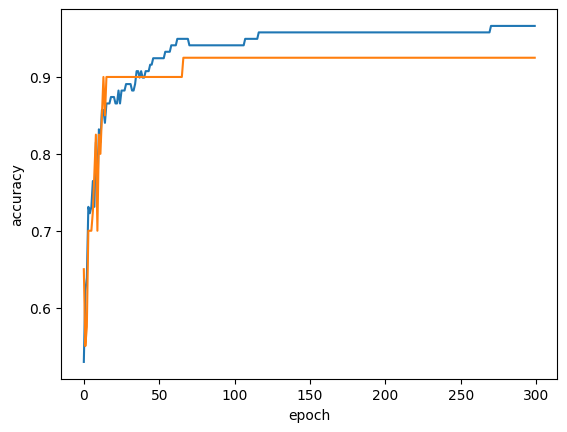

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
# loss='hinge' : 힌지 손실로 서포트 백터 머신이라고도 함, 또다른 머신러닝을 위한 손실함수
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
